In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
start = '2001-01-01'
end = '2022-02-18'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,0.272321,0.260045,0.265625,0.265625,452312000.0,0.227448
2001-01-03,0.297991,0.257813,0.258929,0.292411,817073600.0,0.250384
2001-01-04,0.330357,0.300223,0.323940,0.304688,739396000.0,0.260897
2001-01-05,0.310268,0.286830,0.302455,0.292411,412356000.0,0.250384
2001-01-08,0.303292,0.284598,0.302455,0.295759,373699200.0,0.253251


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-14,169.580002,166.559998,167.369995,168.880005,86185500.0,168.880005
2022-02-15,172.949997,170.250000,170.970001,172.789993,64286300.0,172.789993
2022-02-16,173.339996,170.050003,171.850006,172.550003,61177400.0,172.550003
2022-02-17,171.910004,168.470001,171.029999,168.880005,69589300.0,168.880005
2022-02-18,170.539993,166.190002,169.820007,167.300003,82614200.0,167.300003


In [6]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2001-01-02,0.272321,0.260045,0.265625,0.265625,452312000.0,0.227448
1,2001-01-03,0.297991,0.257813,0.258929,0.292411,817073600.0,0.250384
2,2001-01-04,0.330357,0.300223,0.323940,0.304688,739396000.0,0.260897
3,2001-01-05,0.310268,0.286830,0.302455,0.292411,412356000.0,0.250384
4,2001-01-08,0.303292,0.284598,0.302455,0.295759,373699200.0,0.253251


In [7]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,0.272321,0.260045,0.265625,0.265625,452312000.0
1,0.297991,0.257813,0.258929,0.292411,817073600.0
2,0.330357,0.300223,0.323940,0.304688,739396000.0
3,0.310268,0.286830,0.302455,0.292411,412356000.0
4,0.303292,0.284598,0.302455,0.295759,373699200.0


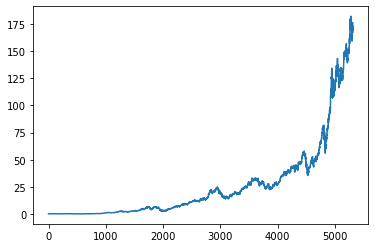

In [8]:
plt.plot(df.Close)

In [9]:
df

,High,Low,Open,Close,Volume
0,0.272321,0.260045,0.265625,0.265625,452312000.0
1,0.297991,0.257813,0.258929,0.292411,817073600.0
2,0.330357,0.300223,0.323940,0.304688,739396000.0
3,0.310268,0.286830,0.302455,0.292411,412356000.0
4,0.303292,0.284598,0.302455,0.295759,373699200.0
...,...,...,...,...,...
5313,169.580002,166.559998,167.369995,168.880005,86185500.0
5314,172.949997,170.250000,170.970001,172.789993,64286300.0
5315,173.339996,170.050003,171.850006,172.550003,61177400.0
5316,171.910004,168.470001,171.029999,168.880005,69589300.0


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5313    161.0511
5314    161.3107
5315    161.5670
5316    161.8021
5317    162.0560
Name: Close, Length: 5318, dtype: float64

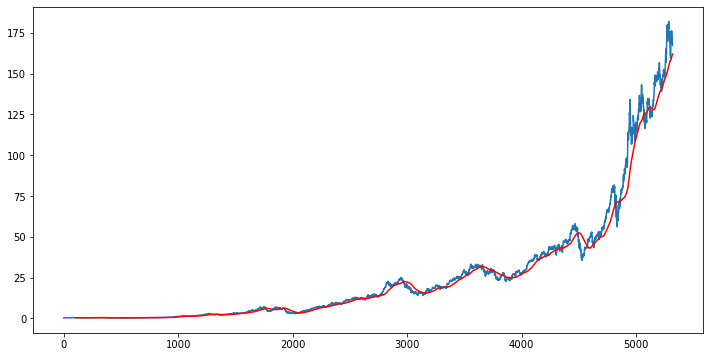

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5313    150.28395
5314    150.48520
5315    150.70870
5316    150.91260
5317    151.10040
Name: Close, Length: 5318, dtype: float64

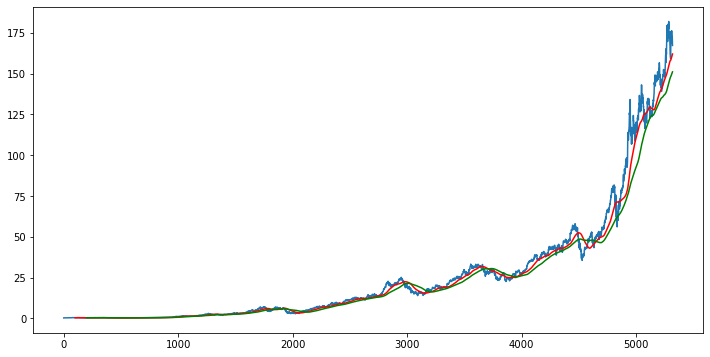

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(5318, 5)

In [15]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3722, 1)
(1596, 1)


In [16]:
data_training.head()

,Close
0,0.265625
1,0.292411
2,0.304688
3,0.292411
4,0.295759


In [17]:
data_testing.head()

,Close
3722,28.442499
3723,28.440001
3724,28.875000
3725,29.770000
3726,28.820000


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00094921],
       [0.00176053],
       [0.00213238],
       ...,
       [0.83992471],
       [0.83371555],
       [0.83894036]])

In [20]:
data_training_array.shape

(3722, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(3622, 100, 1)

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

ModuleNotFoundError: No module named 'keras'